# K-Mean Clustering
- K-mean takes out the complexity from the decision making processing which allows you to very easily identify those clusters are actually called cluster of data point.
- **Steps to find K-Mean;**

        Step 1 : Chosse the number K of clusters.    
        Step 2 : Select at random K point, the centroid (not necessarily from your dataset)
        Step 3 : Assign each data point to the closest centroid -> That forms K clusters    
        Step 4 : Computer and place the new centroid of each cluster.
        Step 5 : Reaasign each data point to the new closest centroid. If any reassignment took place, go to Step 4, 
                 otherwise go to FIN.

**Importing Packages**

In [1]:
# Numpy allows us to work with array.
import numpy as np

# Maptplotlib which allows us to plot some chart.
import matplotlib.pyplot as plt

# Pandas allows us to not only import the datasets but also create the matrix of features(independent) and 
# dependent variable.
import pandas as pd

**Importing Dataset**

- The independent variable usally in the first columns of dataset and dependent variable usally in the last columns of the data sets.
- X is Independent Variable.
- Y is Dependent Variable.

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:, [3,4]].values

print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

**Using the elbow method to find the optimal number of clusters**

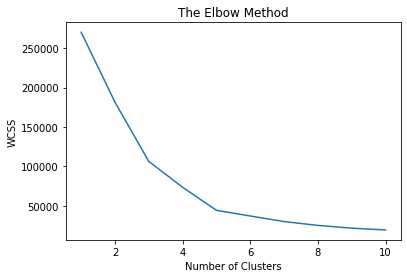

In [5]:
# Importing Package
from sklearn.cluster import KMeans

# WSCC - Within Cluster Sum of Square, 
# It is defined as the sum of the square distances between each observation pointof the cluster.

# Elbow Method 
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

- The optimal number of cluster we must use here is 5, becuase from number 5 the cruve decreasses slowly.

**Training the K-Mean Model on the dataset**

In [7]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
# This method not only trains your KMeans model on the data set, but also it return exactly that dependent variable
# which we are about to create the five different values taken by that variable.

print(y_kmeans)
# This shows the index value of cluster as, first customer belongs to 4th cluster, second customer belongs to 1st 
# cluster and so on.

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


**Visualising the Clusters**

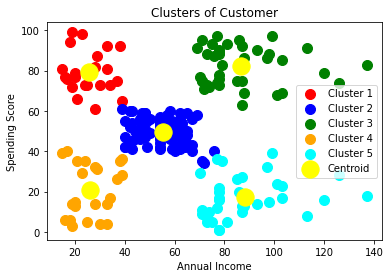

In [10]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = "Cluster 1")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = "Cluster 2")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = "Cluster 3")
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'orange', label = "Cluster 4")
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'cyan', label = "Cluster 5")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "yellow", label = "Centroid")

plt.title("Clusters of Customer")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

- The cluster 4 contains all the customers that have a low annual income and who spends very low in the mall.
- The cluster 5 contains all the customers that have a high annual income and who spends very low in the mall.
- The cluster 1 contains all the customers that have a low annual income and yet have a high spending score in the mall.
- The cluster 3 contains all the customers that have a high annual income and also who spend a lot in the mall.
- The cluster 2 contains all the customers that have an average annual income and spends normally in the mall.